<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/02_unsupervised_learning/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering in Unsupervised Learning

Clustering is an unsupervised machine learning technique used to group similar data points together. Unlike supervised learning, we don’t provide labeled outcomes.

In this notebook, you'll learn:
- What clustering is
- How K-Means works
- How to choose the optimal number of clusters
- How to visualize and interpret clusters

### **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")

### **Generate Sample Dataset**

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Convert to DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df.head()

,Feature1,Feature2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


### **Visualize the Raw Data**

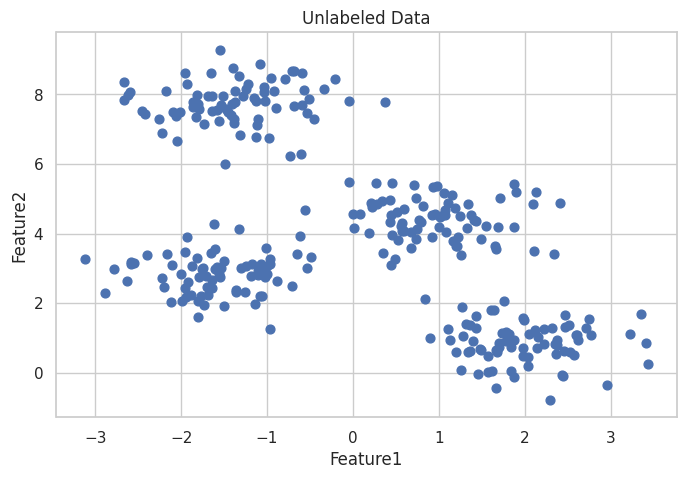

In [3]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Feature1'], df['Feature2'], s=40)
plt.title("Unlabeled Data")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

### **K-Means Clustering**

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Add predictions to the DataFrame
df['Cluster'] = y_kmeans

### **Visualize Clusters**

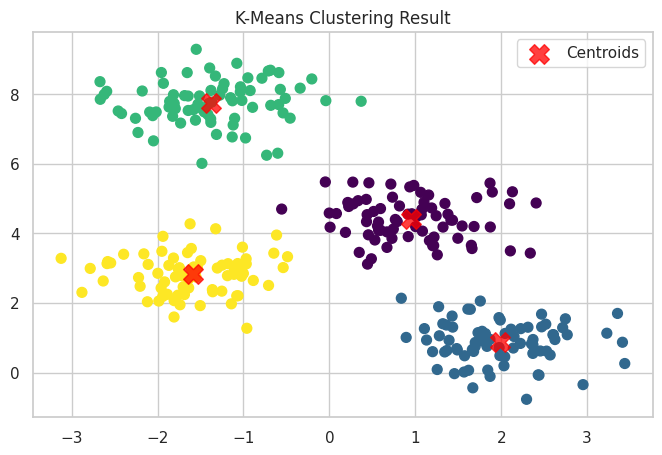

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering Result")
plt.legend()
plt.show()

### **Elbow Method to Choose k**

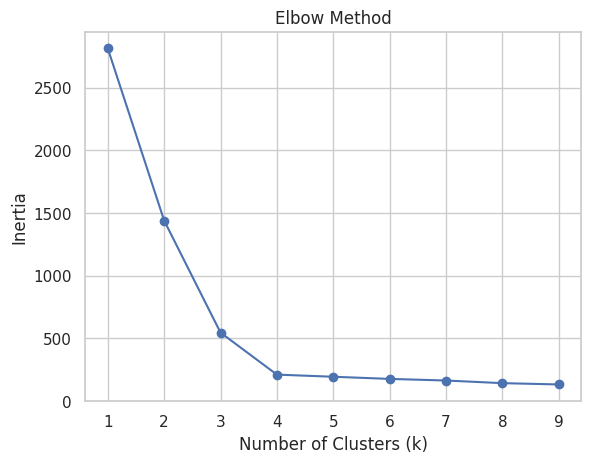

In [6]:
inertias = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

### **Silhouette Score (Cluster Quality)**

In [7]:
score = silhouette_score(X, y_kmeans)
print("Silhouette Score for k=4:", score)

Silhouette Score for k=4: 0.6819938690643478


### **Use Cases of Clustering**

#### **Real-World Applications**
- Customer segmentation in marketing
- Grouping genes or cell types in biology
- Topic modeling in text data
- Image compression (e.g., color quantization)


### **Summary**
You learned:
- What clustering is
- How K-Means works
- How to determine the optimal number of clusters using the Elbow Method
- How to visualize and interpret clusters

**Next:** Explore dimensionality reduction techniques like PCA in `dimensionality_reduction.ipynb`
